# Boiler

In [25]:
import pandas as pd 
import pandasql as ps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)
    
def full(arg):
    f()
    display(arg)
    nf()

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 10, h = 7, dpi = 200):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Mutual information Feature Selection

## Load data

In [42]:
df = pd.read_csv('data/aps_failure_training_set.csv', sep = ',')
df

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59998   neg   80292     na  2130706432    494      0      0      0      0   
59999   neg   40222     na         698    628      0      0      0      0   

      ag_002 ag_003 ag_004   ag_005   ag_006   ag_007  ag_008 ag_009   ah_000  \
0          0      0  37250  1432864  3664156  1007684   25896      0  2551696   
1          0      0  18254   653294  1720800   516724   31642      0  1393352   
...      ...    ...    ...      ...      ...      ...     ...    ...      ...   
59998      0      0    330   202498  3251010  2061456  360436  59754  2634394   
59999      0      0   1226    46284  1901140   855376   61744   6318  1235850   

      ai_000 aj_000 ak_000 al_000 am_0   an_000   ao_000   ap_000   aq_000  \
0          0      0      0      0    0  4933296  3655166  1766008  1132040   
1          0     68      0      0    0  2560898  2127150  1084598   338544   
...      ...    ...    ...    ...  ...      ...      ...      ...      ...   
59998      0      0      0      0    0  4543410  3227856  1615634  1214970   
59999   1926    474      0      0    0  2502090  2109168   573660   334864   

      ar_000 as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003  \
0          0      0      0      0   1012    268      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
59998      0      0  57300      0   2124   1090      0      0      0      0   
59999      0      0      0      0   2260    266      0      0      0      0   

      ay_004  ay_005   ay_006   ay_007  ay_008 ay_009 az_000 az_001 az_002  \
0          0  469014  4239660   703300  755876      0   5374   2108   4114   
1          0   71510   772720  1996924   99560      0   7336   7808  13776   
...      ...     ...      ...      ...     ...    ...    ...    ...    ...   
59998      0  119742  4445146  1370596       0      0   5518   4092   4534   
59999      0  105702  1433988  1205298  127100      0   3298   2162   3654   

       az_003   az_004   az_005 az_006 az_007 az_008 az_009   ba_000   ba_001  \
0       12348   615248  5526276   2378      4      0      0  2328746  1022304   
1       13086  1010074  1873902  14726      6      0      0  1378576   447166   
...       ...      ...      ...    ...    ...    ...    ...      ...      ...   
59998   10448   940376  4970242    274      0      0      0  2154166  1022460   
59999  219406  2115972   527578     18      0      0      0  1035916   485312   

       ba_002  ba_003  ba_004  ba_005   ba_006   ba_007 ba_008 ba_009  \
0      415432  287230  310246  681504  1118814     3574      0      0   
1      199512  154298  137280  138668   165908   229652  87082   4708   
...       ...     ...     ...     ...      ...      ...    ...    ...   
59998  385878  287818  239818  265302   552874  1027168      0      0   
59999  271670  244150  220858  197840   224530   191788     24      0   

        bb_000 bc_000 bd_000 be_000 bf_000   bg_000  bh_000  bi_000   bj_000  \
0      6700214      0     10    108     50  2551696   97518  947550   799478   
1      3646660     86    454    364    350  1393352   49028  688314   392208   
...        ...    ...    ...    ...    ...      ...     ...     ...      ...   
59998  6159728     64     78    424     70  2634394  105862  580084  1032454   
59999  3076406     84    152     98      2  1235850   37110  310028   260378   

       bk_000  bl_000  bm_000  bn_000  bo_000 bp_000 bq_000 br_000  bs_000  \
0      330760  353400  299160  305200  283680     na     na     na  178540   
1      341420  359780  366560      na      na     na     na     na    6700   
..

In [119]:
test = pd.read_csv('data/aps_failure_test_set.csv', sep = ',')

In [121]:
test = test.replace('na',np.nan)

test = test.dropna()

X_test = test.drop('class', axis = 1)
y_test = test['class']

<AxesSubplot:ylabel='count'>

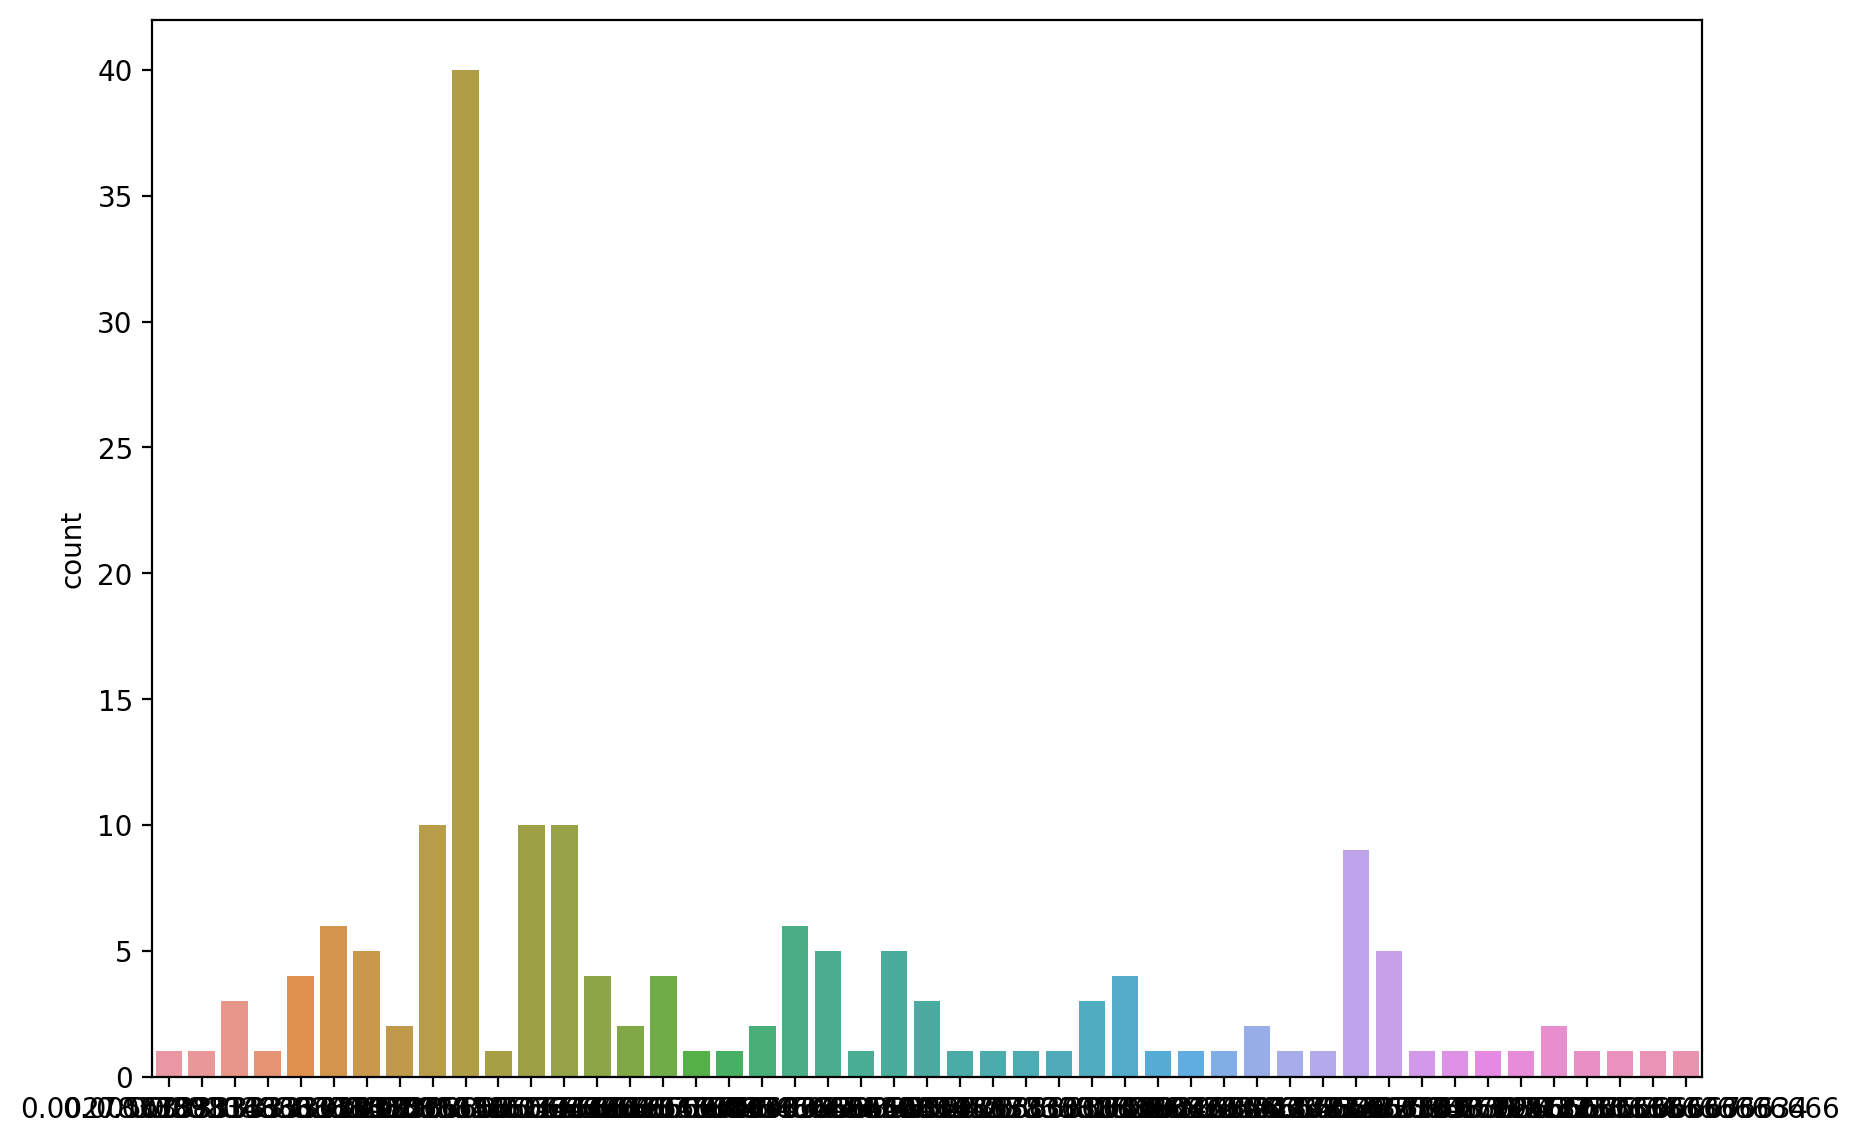

In [43]:
df = df.replace('na',np.nan)

df = df.dropna()

sns.countplot(X_train.isna().sum()/X_train.shape[0])

In [44]:
from sklearn.feature_selection import mutual_info_classif

In [45]:
X_train = df.drop('class', 1)
y_train = df['class']

In [46]:
X_train = X_train.astype(float)

In [47]:
mi = mutual_info_classif(X_train, y_train)

In [48]:
dir(mi)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [61]:
cols = X_train.columns
values = np.round(mi.view(),4)
dicti = dict(zip(cols,values))

In [93]:
 _plot = pd.DataFrame.from_dict(data = dict(sorted(dicti.items(), key=lambda item: item[1])), orient = 'index')

_plot = _plot.reset_index().rename(columns = {'index':'features',0:'mutual_information'}).\
sort_values(by = 'mutual_information', ascending =  False)
_plot

features  mutual_information
169   bj_000              0.2143
168   al_000              0.1757
..       ...                 ...
11    eg_000              0.0000
0     ak_000              0.0000

[170 rows x 2 columns]

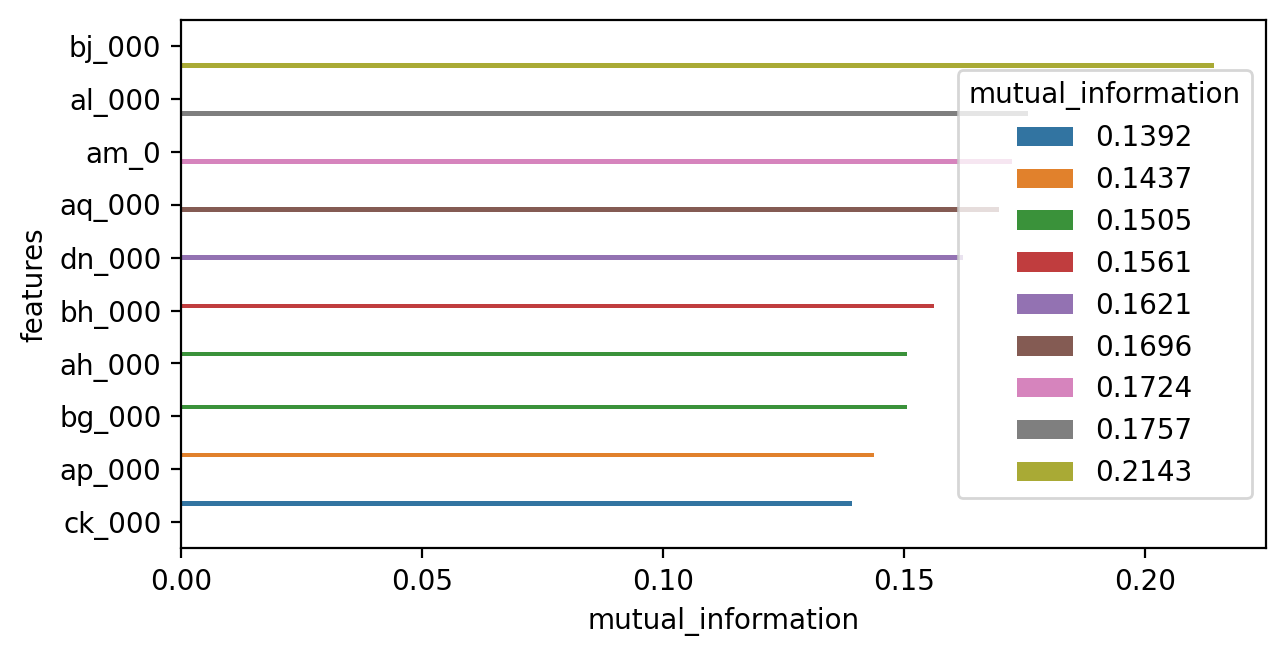

In [94]:
_show = 10
values = _plot.mutual_information[:_show]
fg(w = 7, h = _show*0.35)
sns.barplot(y = _plot.features[:_show], x = values, hue = values, orient = 'h');

In [152]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

xboost = XGBClassifier()

xboost.fit(X_train, y_train)

[13:16:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

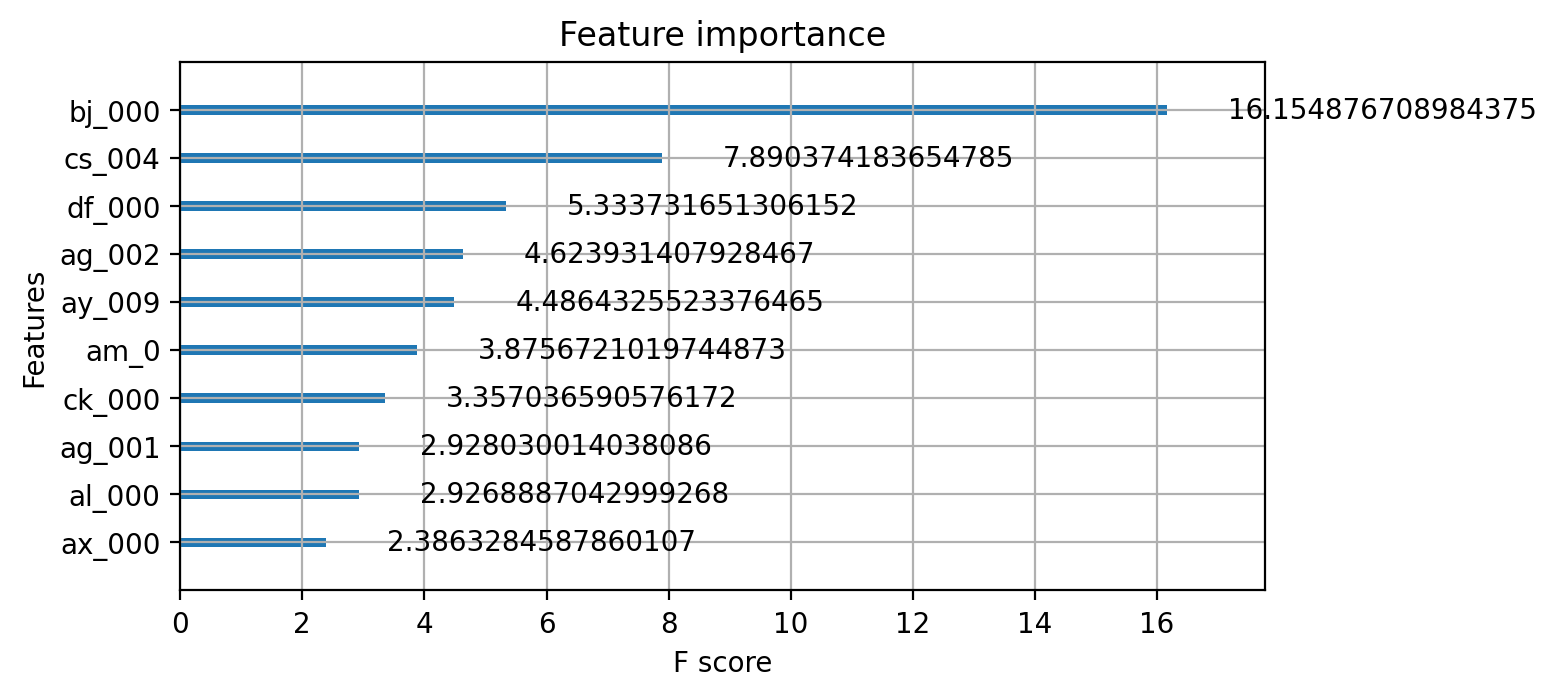

In [159]:
from xgboost import plot_importance
plot_importance(xboost, max_num_features=10, importance_type = 'gain') # top 10 most important features
plt.show()

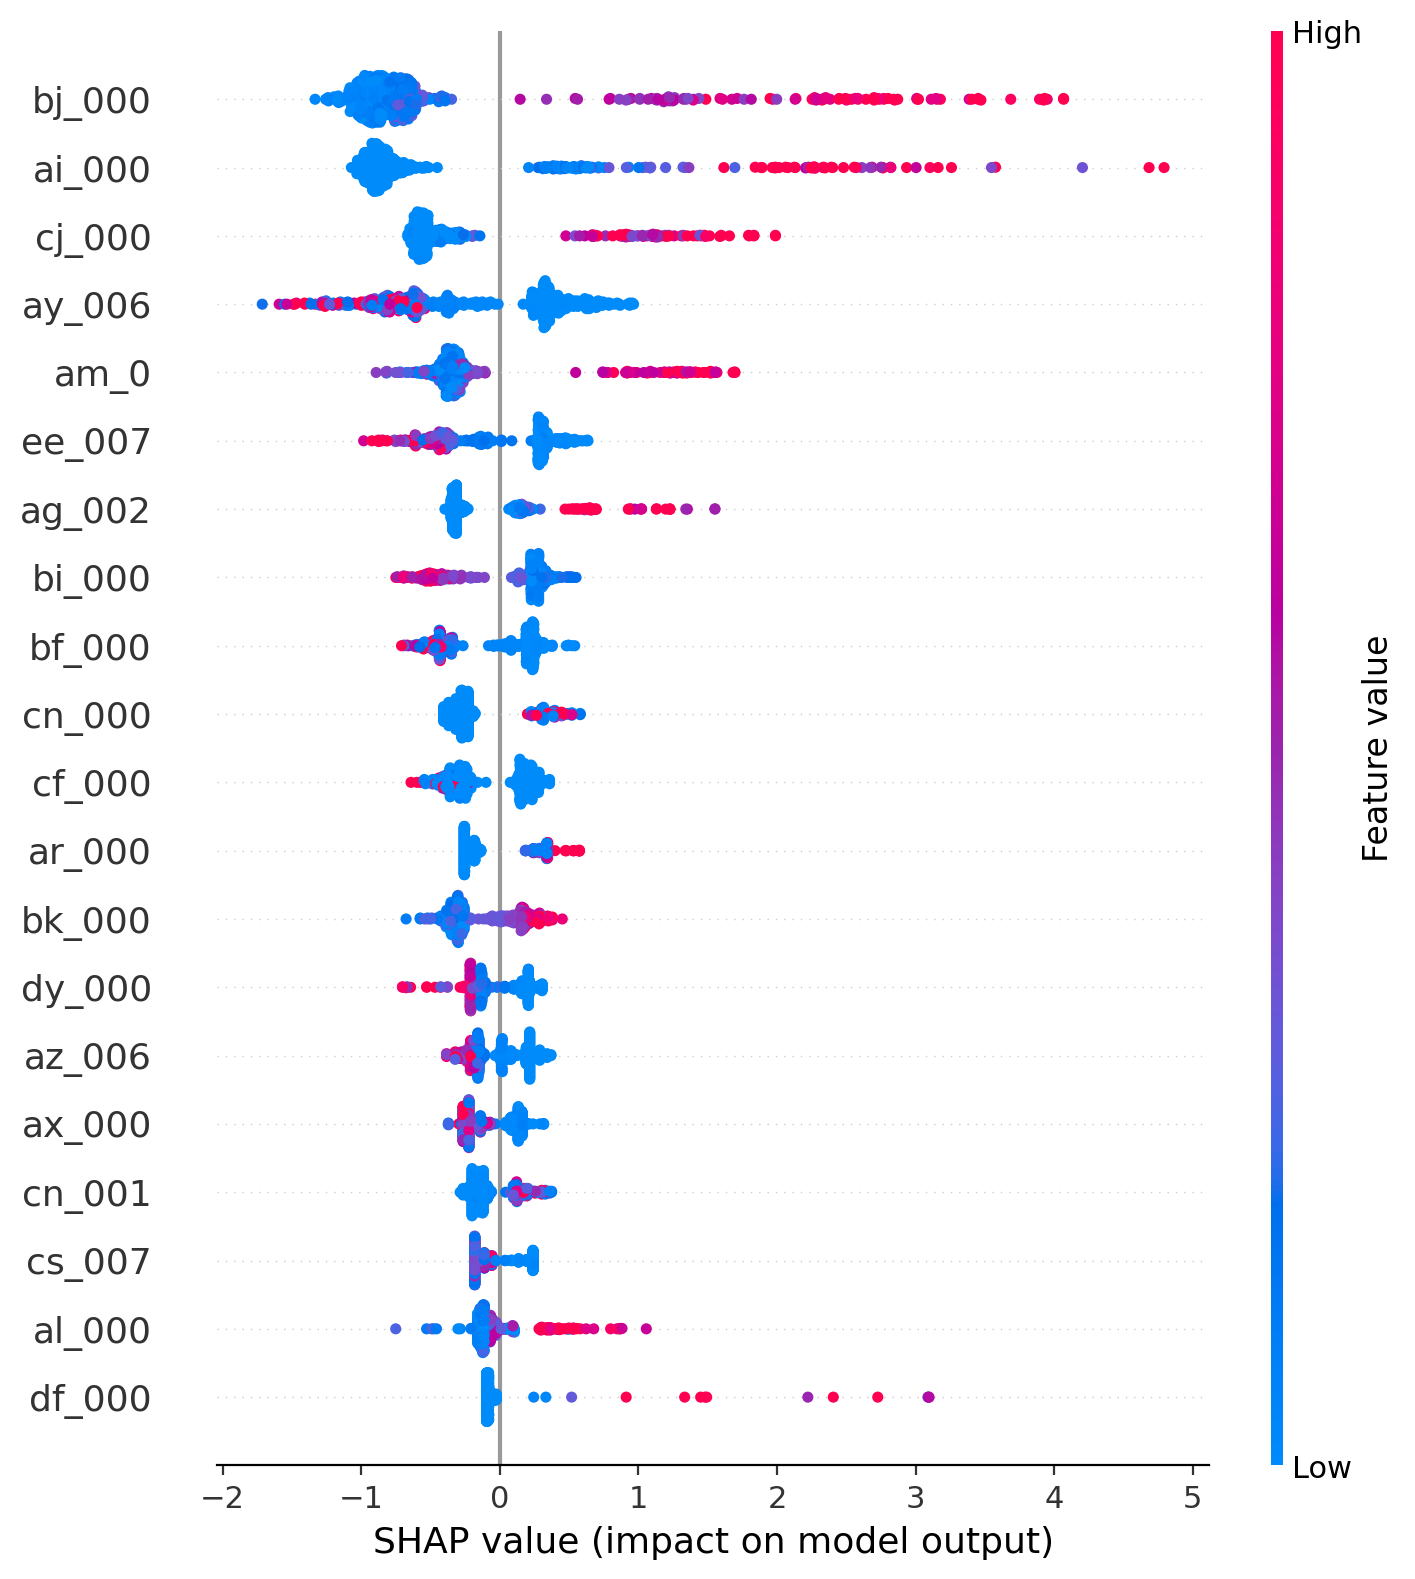

In [156]:
import shap 

explainer = shap.TreeExplainer(xboost)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)